# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [40]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import spacy
from spacy import displacy


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\padma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [42]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [43]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")

In [44]:
bitcoin_news

{'status': 'ok',
 'totalResults': 9447,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'New York passes a bill to limit bitcoin mining',
   'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
   'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
   'publishedAt': '2022-06-03T16:11:26Z',
   'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"},
  {'source': {'id': 

In [45]:
# Print total Bitcoin news articles
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 9447


In [46]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news

{'status': 'ok',
 'totalResults': 4570,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Barr',
   'title': 'GameStop Dunks Its Head Into the Crypto Kiddie Pool',
   'description': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though it’s hard to say whether its proposed population of gamers and game developers will take up the company on its belated, head-first jump into the crypto sph…',
   'url': 'https://gizmodo.com/gamestop-crypto-nft-wallet-blockchain-1848965386',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cd4c128b4182d7b2fba8152d7bb35733.jpg',
   'publishedAt': '2022-05-23T21:35:00Z',
   'content': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]'}

In [47]:
# Print total Ethereum news articles
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 4570


In [48]:
# Create a function that accepts a topic DataFrame, and creates and returns the sentiment scores DataFrame
def create_sentiments_df(topic_news):
    """Creates and returns a sentiments scores DataFrame."""
    
    topic_sentiments = []

    for article in topic_news["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            topic_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            pass

    # Create the DataFrame
    topic_df = pd.DataFrame(topic_sentiments)

    # Reorder the DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    topic_df = topic_df[cols]

    return topic_df



In [49]:
# Create the Bitcoin sentiment scores DataFrame
# Call the create_sentiments_df() function and assign the returned DataFrame to bitcoin_df
bitcoin_df = create_sentiments_df(bitcoin_news)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [50]:
# Create the Ethereum sentiment scores DataFrame
# Call the create_sentiments_df() function and assign the returned DataFrame to ethereum_df
ethereum_df = create_sentiments_df(ethereum_news)
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875


In [51]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.016715,0.065600,0.057650,0.876800
std,0.398865,0.061384,0.068859,0.092058
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.317450,0.000000,0.000000,0.835250
50%,0.051350,0.065500,0.049000,0.881000
75%,0.334100,0.116500,0.083250,0.932750
max,0.526700,0.187000,0.300000,1.000000


In [52]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.037305,0.04200,0.051150,0.906900
std,0.405662,0.04527,0.085919,0.084171
min,-0.948500,0.00000,0.000000,0.628000
25%,-0.381800,0.00000,0.000000,0.877250
50%,0.000000,0.03800,0.020000,0.925000
75%,0.328950,0.07650,0.077500,0.955750
max,0.585900,0.13400,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [53]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a set of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords set if necessary
sw_addons = {'said', 'today', 'week'}
sw = sw.union(sw_addons)


In [54]:
# Complete the tokenizer function
def tokenizer(text, sw):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words_lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in words_lower if word not in sw]
    
    
    return tokens

In [55]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = [tokenizer(text, sw) for text in bitcoin_df["text"]]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[rapper, entrepreneur, shawn, carter, better, ..."
2,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."
4,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [56]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = [tokenizer(text, sw) for text in ethereum_df["text"]]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, ha, officially, thrown, headlong, w..."
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfer, paypals..."
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[decentralized, autonomous, organization, dao,..."
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875,"[crypto, winter, may, ethereum, looks, like, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [57]:
# Define a function that creates a master list of all the tokens in a given DataFrame
def create_df_tokens_list(df):
    """Creates and returns a list of all the tokens in a DataFrame."""
    
    # Create a new list that will contain the tokens of all the token lists in the given DataFrame's "tokens" column
    master_tokens_list = []
    df_tokens = df["tokens"]
    for tokens_list in df_tokens:
        for token in tokens_list:
            master_tokens_list.append(token)
    return master_tokens_list


In [58]:
# Generate the Bitcoin N-grams where N=2
# First call the create_df_tokens_list() to create the list of all the bitcoin tokens 
bitcoin_tokens_list = create_df_tokens_list(bitcoin_df)
bitcoin_bigrams = list(ngrams(bitcoin_tokens_list, n=2))
# Show a sample of the bigrams
print(bitcoin_bigrams[:20])


[('new', 'york'), ('york', 'lawmaker'), ('lawmaker', 'passed'), ('passed', 'bill'), ('bill', 'would'), ('would', 'temporarily'), ('temporarily', 'ban'), ('ban', 'new'), ('new', 'bitcoin'), ('bitcoin', 'mining'), ('mining', 'operation'), ('operation', 'early'), ('early', 'friday'), ('friday', 'state'), ('state', 'senator'), ('senator', 'voted'), ('voted', 'pas'), ('pas', 'legislation'), ('legislation', 'bound'), ('bound', 'desk')]


In [59]:
# Generate the Ethereum N-grams where N=2
# First call the create_df_tokens_list() to create the list of all the ethereum tokens 
ethereum_tokens_list = create_df_tokens_list(ethereum_df)
ethereum_bigrams = list(ngrams(ethereum_tokens_list, n=2))
# Show a sample of the bigrams
print(ethereum_bigrams[:20])


[('gamestop', 'ha'), ('ha', 'officially'), ('officially', 'thrown'), ('thrown', 'headlong'), ('headlong', 'web'), ('web', 'viper'), ('viper', 'nest'), ('nest', 'new'), ('new', 'app'), ('app', 'release'), ('release', 'though'), ('though', 'hard'), ('hard', 'say'), ('say', 'whether'), ('whether', 'proposed'), ('proposed', 'population'), ('population', 'gamers'), ('gamers', 'game'), ('game', 'developer'), ('developer', 'take')]


In [60]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [61]:
# Use token_count to get the top 10 words for Bitcoin
# Use the master bitcoin tokens list created above
# Create a dictionary from the results of the token_count function call
bitcoin_top_10 = dict(token_count(bitcoin_tokens_list, 10))
# Create a DataFrame using the dictionary
pd.DataFrame(list(bitcoin_top_10.items()), columns=["word", "count"])

,word,count
0,char,20
1,bitcoin,15
2,new,8
3,token,6
4,blockchain,6
5,digital,4
6,biggest,4
7,cryptocurrencies,4
8,cryptocurrency,4
9,reuters,4


In [62]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = dict(token_count(ethereum_tokens_list, 10))
# Create a DataFrame using the dictionary
pd.DataFrame(list(ethereum_top_10.items()), columns=["word", "count"])


,word,count
0,char,20
1,cryptocurrency,10
2,ha,6
3,crypto,5
4,new,4
5,ethereum,4
6,market,4
7,year,4
8,nft,4
9,video,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Set the font size for the word cloud title
mpl.rcParams['font.size'] = 35.0

In [64]:
# Define a function that generates a word cloud given a tokens list, and a title
def create_wordcloud(tokens_list, title):
    """Generates a titled word cloud from a given tokens list."""
    
    input_text = ' '.join(tokens_list)
    wc = WordCloud().generate(input_text)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set(title=title)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

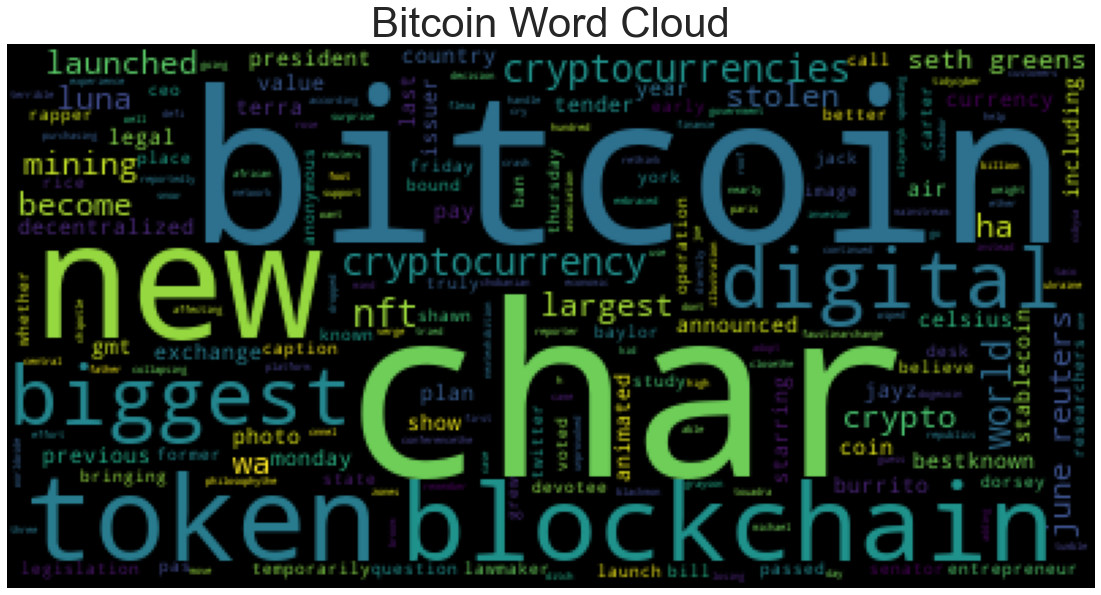

In [65]:
# Generate the Bitcoin word cloud
# Use the create_wordcloud() function 
create_wordcloud(bitcoin_tokens_list, "Bitcoin Word Cloud")

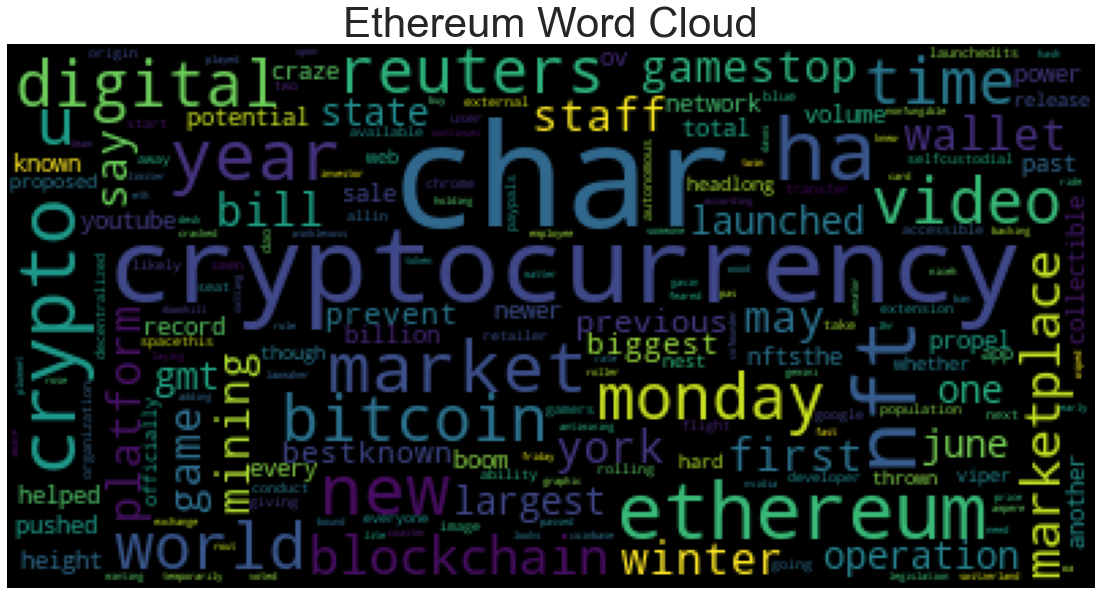

In [66]:
# Generate the Ethereum word cloud
create_wordcloud(ethereum_tokens_list, "Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [67]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [68]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [69]:
# Concatenate all of the Bitcoin text together
# Create a list that will hold the text
bitcoin_text_list = [row for row in bitcoin_df["text"]]

# Create one big string from the list
bitcoin_text = ' '.join(bitcoin_text_list)
bitcoin_text

"New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars] Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch of Bitcoin A… [+2920 chars] A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. \r\n Researchers from Baylor, Rice, and t… [+7343 chars] Image caption, President Faustin-Archange Touadéra wants to rethink his country's economic philosophy\r\nThe Central African Republic's decision to adopt Bitcoin as legal tender came as a surprise to m… [+8881 chars] You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending y

In [70]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [71]:
# Render the visualization
displacy.render(bitcoin_doc, style="ent")

In [72]:
# List all Entities
bitcoin_entities = [ent.text for ent in bitcoin_doc.ents]
bitcoin_entities

['New York',
 'Friday',
 '36-27',
 'Rapper',
 'Shawn Carter',
 'Jay-Z',
 'Thursday',
 'Jay-Z',
 'Jack Dorsey',
 'Faustin-Archange Touadéra',
 "The Central African Republic's",
 'Bitcoin',
 'first',
 'Joe TidyCyber',
 'this week',
 'billions',
 'Bitcoin',
 'Salvador',
 'hundreds',
 'last year',
 'nearly three feet',
 'The Paris NFT Day',
 'The Celsius Network',
 'DeFi',
 '] Photo Illustration',
 'Grayson Blackmon',
 'Oliyarnyk / CC-BY-SA-4.0',
 'Michael Chobanian',
 'the Blockchain Association of Ukraine',
 'Reuters',
 '5.2%',
 '31,441.76',
 'GMT',
 'Monday',
 '1,552.78',
 '34.8%',
 'year',
 'Reuters',
 '12.1%',
 '23,366',
 'GMT',
 'Monday',
 '3,218.95',
 '51.6%',
 'June 14',
 'Reuters',
 'Tuesday',
 'MicroStrategy Inc',
 'May 24',
 'Reuters',
 'its ninth week',
 'today',
 "Seth Green's",
 'NFT',
 'two',
 "Seth Green's",
 'Nike',
 "Seth Green's",
 'NFT',
 'Sam Bankman-Fried',
 'the digital asset exchange',
 'FTX',
 'Riot Blockchain',
 'Marathon Digital Holdings']

---

### Ethereum NER

In [73]:
# Concatenate all of the Ethereum text together
# Create a list that will hold the text
ethereum_text_list = [row for row in ethereum_df["text"]]

# Create one big string from the list
ethereum_text = ' '.join(ethereum_text_list)
ethereum_text

'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars] GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The wallet will be accessible through a Google Chrome extension an… [+1491 chars] The ability to conduct external transfers on PayPal\'s crypto platform, an image of which can be seen below, will start rolling out to users today and be available to everyone in the U.S. in the next … [+687 chars] A decentralized autonomous organization, or DAO, is giving away two seats on a Blue Origin flight to space.\r\nThis is likely the first time non-fungible tokens, or NFTs, have played a role in minting … [+4509 chars] Crypto Winter It May Be, But Ethereum Looks Like A Buy \r\nThe Winklevoss twins are cutting the staff at Gemini and say crypto winter 

In [74]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [75]:
# Render the visualization
displacy.render(ethereum_doc, style="ent")

In [76]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_doc.ents]
ethereum_entities

['GameStop',
 'web3',
 'Ethereum',
 'Monday',
 'Google Chrome',
 'PayPal',
 'today',
 'U.S.',
 'DAO',
 'two',
 'Blue Origin',
 'first',
 'Gemini',
 'Ethereum (Cryptocurrency',
 '+3614',
 'New York',
 'Friday',
 '36-27',
 'Switzerland',
 'May 25',
 'Reuters',
 'Gavin Wood',
 'Nvidia',
 'Ampere Lite Hash Rate',
 'LHR',
 'Ethereum',
 '18%',
 'about 1,100',
 'Reuters',
 '5.2%',
 '31,441.76',
 'GMT',
 'Monday',
 '1,552.78',
 '34.8%',
 'year',
 'Reuters',
 '12.1%',
 '23,366',
 'GMT',
 'Monday',
 '3,218.95',
 '51.6%',
 'Buterin',
 'AI',
 'Eliezer Yudkowsky',
 'YouTube',
 'Elon Musk',
 'YouTube',
 'the past few years',
 'NFT',
 '$29 billion',
 'several years ago',
 'Kim Kardashian',
 'Floyd Mayweather',
 'NBA',
 'Paul Pierce',
 'Ether',
 'NFT',
 'NFT',
 'Solana',
 'third',
 '10%',
 'Wednesday',
 'the past few years',
 'NFT',
 '$29 billion',
 '6',
 '6',
 "New York's"]

---